In [1]:
import time
import numpy as np
import pandas as pd
from sklearn import metrics
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel (r'malaria.xlsx')
print (data)
data=data.loc[2:,:]

     Sl no  Age (in years)  Sex  \
0      NaN             NaN  NaN   
1      1.0            41.0  1.0   
2      2.0            32.0  0.0   
3      3.0            50.0  0.0   
4      4.0            43.0  1.0   
..     ...             ...  ...   
306  306.0            57.0  0.0   
307  307.0            23.0  0.0   
308  308.0            51.0  0.0   
309  309.0            32.0  1.0   
310  310.0            30.0  0.0   

     Clinical symptoms 1 - Severe fever with chills and sweating,  \
0                                                  NaN              
1                                                  0.0              
2                                                  1.0              
3                                                  1.0              
4                                                  0.0              
..                                                 ...              
306                                                1.0              
307                        

In [3]:
positive = data.loc[data['Target']==1]
negative = data.loc[data['Target']==0]

X = data.iloc[:,0:9]
Y = data.iloc[:,-1]

In [4]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 25)

In [35]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(xtrain, ytrain)
pred_rfc = RFC.predict(xtest)
acc_rfc = metrics.accuracy_score(ytest, pred_rfc)*100
joblib.dump(RFC, 'models/model_RF1.pkl')


print('1. Using Random Forest Method')
print('Accuracy - {}'.format(acc_rfc))
print('Recall - {}'.format(metrics.recall_score(ytest, pred_rfc)))
print('Precision Score - {}'.format(metrics.precision_score(ytest, pred_rfc)))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest, pred_rfc))
print('\n')
time.sleep(1)

1. Using Random Forest Method
Accuracy - 100.0
Recall - 1.0
Precision Score - 1.0
Confusion matrix
[[10  0]
 [ 0 15]]




In [36]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(xtrain, ytrain)
pred_gb = GB.predict(xtest)
acc_gb = metrics.accuracy_score(ytest, pred_gb)*100
joblib.dump(GB, 'models/model_GB1.pkl')


print('2. Using Gradient Boosting Method')
print('Accuracy - {}'.format(acc_gb))
print('Recall - {}'.format(metrics.recall_score(ytest, pred_gb)))
print('Precision Score - {}'.format(metrics.precision_score(ytest, pred_gb)))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest, pred_gb))
print('\n')

2. Using Gradient Boosting Method
Accuracy - 100.0
Recall - 1.0
Precision Score - 1.0
Confusion matrix
[[10  0]
 [ 0 15]]




In [42]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xtrain, ytrain)
pred_lr = LR.predict(xtest)
acc_lr = metrics.accuracy_score(ytest, pred_lr)*100
joblib.dump(LR, 'models/model_LR1.pkl')

print('3. Using Logistic Regression Method')
print('Accuracy - {}'.format(acc_lr))
print('Recall - {}'.format(metrics.recall_score(ytest, pred_lr)))
print('Precision Score - {}'.format(metrics.precision_score(ytest, pred_lr)))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest, pred_lr))
print('\n')

3. Using Logistic Regression Method
Accuracy - 96.0
Recall - 1.0
Precision Score - 0.9375
Confusion matrix
[[ 9  1]
 [ 0 15]]




In [38]:
from sklearn import svm
SVM = svm.LinearSVC(loss='hinge')
SVM.fit(xtrain, ytrain)
pred_svm = SVM.predict(xtest)
acc_svm = metrics.accuracy_score(ytest, pred_svm)*100
joblib.dump(SVM, 'models/model_SVM1.pkl')

print('4. Using SVM Method')
print('Accuracy - {}'.format(acc_svm))
print('Recall - {}'.format(metrics.recall_score(ytest, pred_svm)))
print('Precision Score - {}'.format(metrics.precision_score(ytest, pred_svm)))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest, pred_svm))
print('\n')

4. Using SVM Method
Accuracy - 100.0
Recall - 1.0
Precision Score - 1.0
Confusion matrix
[[10  0]
 [ 0 15]]




In [39]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(xtrain, ytrain)
pred_knn = KNN.predict(xtest)
acc_knn = metrics.accuracy_score(ytest, pred_knn)*100
joblib.dump(KNN,'models/model_KNN1.pkl')


print('5. Using KNN Method')
print('Accuracy - {}'.format(acc_knn))
print('Recall - {}'.format(metrics.recall_score(ytest, pred_knn)))
print('Precision Score - {}'.format(metrics.precision_score(ytest, pred_knn)))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest, pred_knn))
print('\n')

5. Using KNN Method
Accuracy - 84.0
Recall - 0.8666666666666667
Precision Score - 0.8666666666666667
Confusion matrix
[[ 8  2]
 [ 2 13]]




In [40]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=10, random_state=101, max_features=None, min_samples_leaf=10)
DT.fit(xtrain, ytrain)
pred_DT = DT.predict(xtest)
acc_DT = metrics.accuracy_score(ytest, pred_DT)*100
joblib.dump(DT,'models/model_DT1.pkl')


print('6. Using Decision Tree Method')
print('Accuracy - {}'.format(acc_DT))
print('Recall - {}'.format(metrics.recall_score(ytest, pred_DT)))
print('Precision Score - {}'.format(metrics.precision_score(ytest, pred_DT)))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest, pred_DT))
print('\n')

6. Using Decision Tree Method
Accuracy - 100.0
Recall - 1.0
Precision Score - 1.0
Confusion matrix
[[10  0]
 [ 0 15]]




In [29]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(20,4,1))
MLP.fit(xtrain, ytrain)
pred_MLP = MLP.predict(xtest)
acc_MLP = metrics.accuracy_score(ytest, pred_MLP)*100
joblib.dump(DT,'models/model_MLP1.pkl')

print('8. Using MLP Method')
print('Accuracy - {}'.format(acc_MLP))
print('Recall - {}'.format(metrics.recall_score(ytest, pred_MLP)))
print('Precision Score - {}'.format(metrics.precision_score(ytest, pred_MLP)))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest, pred_MLP))
print('\n')

8. Using MLP Method
Accuracy - 80.0
Recall - 1.0
Precision Score - 0.75
Confusion matrix
[[ 5  5]
 [ 0 15]]




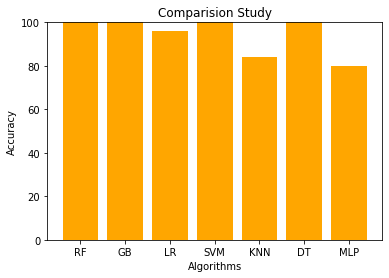

In [43]:
import matplotlib.pyplot as plt

#Defining labels and data
height = [acc_rfc, acc_gb, acc_lr, acc_svm , acc_knn, acc_DT, acc_MLP]
bars = ('RF', 'GB', 'LR', 'SVM', 'KNN', 'DT', 'MLP')
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(y_pos, height, color = (1.00, 0.65, 0.00, 1.0))
 
# Add Title and Axis names

plt.title('Comparision Study')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
 
# Limits for the Y axis
plt.ylim(0,100) 
# Create names
plt.xticks(y_pos, bars) 
#Save the graphic
plt.savefig('Comparison_Study')
# Show graphic
plt.show()